In [2]:
%pip install matplotlib
%pip install pandas
%pip install openpyxl
%pip install ir_datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 2.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.3/98.3 kB 952.4 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 1.4 MB/s eta 0:00:0000:0100:010m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 844.1 kB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.2/63.2 kB 1.3 MB/s eta 0:00:00-:--:--
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.7/229.7 kB 1.8 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.0/250.0 kB 2.5 MB/s eta 0:00:00a 0:00:01

[notice] A new r

In [3]:
import numpy as np
import pandas as pd
import json
import ir_datasets
import functions.evaluetion_functions as ev
import matplotlib.pyplot as plt

# CARREGA DADOS

In [7]:
f = open('nir_ndcg.json')
nir_ndcg = json.load(f)

f = open('els_ndcg.json')
els_ndcg = json.load(f)

metrics = ev.merge(nir_ndcg, els_ndcg)

f = open('nir_recall_precision.json')
nir_f_score = json.load(f)

f = open('els_recall_precision.json')
els_f_score = json.load(f)

# df = pd.DataFrame(nir_f_score)
# with open('recallnir.tex', 'w') as tf:
#     tf.write(df[["recall", "precision", "f_scores"]]
#              .rename(columns={
#                  "recall": "Recuperação", 
#                  "precision": "Precisão", 
#                  "f_scores":"F score"
#                 })
#              .to_latex(
#                 index=True,
#                 caption="Dados de recuperação, precisão e f-score ",
#                 label="tab:fscorenir",
#                 escape=False,
#                 column_format="cccc"
#                 ))


# df_els_ndcg = pd.DataFrame(els_ndcg)
# df_els_f1 = pd.DataFrame(els_f_score)

# df_nir_ndcg = pd.DataFrame(nir_ndcg)
# df_nir_f1 = pd.DataFrame(nir_f_score)

In [273]:
# df_els_ndcg.to_excel('xls/els_ndcg.xlsx')
# df_nir_ndcg.to_excel('xls/nir_ndcg.xlsx')
# df_els_f1.to_excel('xls/els_f1.xlsx')
# df_nir_f1.to_excel('xls/nir_f1.xlsx')

## Valor médio de recall

In [27]:
count_nir = 17
sum = 0
for key in nir_f_score["recall"]:
    sum = sum + float(nir_f_score["recall"][key])

print("Média RECALL NIR: " + str((sum / count_nir)))

count_els = len(els_f_score["recall"])
sum = 0
for key in els_f_score["recall"]:
    sum = sum + float(els_f_score["recall"][key])

print("Média RECALL ELS: " + str((sum / count_nir)))

Média RECALL NIR: 0.1154895814117647
Média RECALL ELS: 0.12053457022941177


## Média de precisão 

In [28]:
count_nir = 17
sum = 0
for key in nir_f_score["precision"]:
    sum = sum + float(nir_f_score["precision"][key])

print("Média Precisão NIR: " + str((sum / count_nir)))

count_els = len(els_f_score["precision"])
sum = 0
for key in els_f_score["precision"]:
    sum = sum + float(els_f_score["precision"][key])

print("Média Precisão ELS: " + str((sum / count_nir)))

Média Precisão NIR: 0.13529411764705887
Média Precisão ELS: 0.14117647058823535


## Média de F1

In [29]:
count_nir = 17
sum = 0
for key in nir_f_score["f_scores"]:
    sum = sum + float(nir_f_score["f_scores"][key])

print("Média F1 NIR: " + str((sum / count_nir)))

count_els = len(els_f_score["f_scores"])
sum = 0
for key in els_f_score["f_scores"]:
    sum = sum + float(els_f_score["f_scores"][key])

print("Média F1 ELS: " + str((sum / count_nir)))

Média F1 NIR: 0.1112428747647059
Média F1 ELS: 0.11485146567058824


## Valor médido do DCG

In [25]:
count_nir = 17
sum = 0
for key in nir_ndcg["nir_dcg_k"]:
    sum = sum + float(nir_ndcg["nir_dcg_k"][key])

print("Média DCG NIR: " + str((sum / count_nir)))

count_els = len(els_ndcg["els_dcg_k"])
sum = 0
for key in els_ndcg["els_dcg_k"]:
    sum = sum + float(els_ndcg["els_dcg_k"][key])

print("Média DCG ELS: " + str((sum / count_nir)))

Média DCG NIR: 1.3807667104764703
Média DCG ELS: 1.5442021434941176


## Valor médio de NDCG

In [26]:
count_nir = 17
sum = 0
for key in nir_ndcg["nir_ndcg_k"]:
    sum = sum + float(nir_ndcg["nir_ndcg_k"][key])

print("Média NDCG NIR: " + str((sum / count_nir)))

count_els = len(els_ndcg["els_ndcg_k"])
sum = 0
for key in els_ndcg["els_ndcg_k"]:
    sum = sum + float(els_ndcg["els_ndcg_k"][key])

print("Média NDCG ELS: " + str((sum / count_nir)))

Média NDCG NIR: 0.10318568234117646
Média NDCG ELS: 0.13221547320588234


# TABELA DE CONSULTAS

In [275]:
import functions.evaluetion_functions as ev
dataset = ir_datasets.load('cranfield')

dict_idcg = {}
dict_qid = {}
list_qid = []
list_query = []
list_doc_rel = []
list_sys = []


for key in nir_f_score['query_ids']:
    qid = nir_f_score['query_ids'][key]
    dict_qid[qid] = 'nir'
    dict_idcg[qid] = nir_ndcg['true_dcg_k'][key]


for key in els_f_score['query_ids']:

    local_key = els_f_score['query_ids'][key]
    dict_idcg[local_key] = nir_ndcg['true_dcg_k'][key]
    
    if local_key in dict_qid:
        dict_qid[els_f_score['query_ids'][key]] = 'els / nir'
    else:
        dict_qid[els_f_score['query_ids'][key]] = 'els'


myKeys = list(dict_qid.keys())
myKeys.sort()
sorted_dict = {i: dict_qid[i] for i in myKeys}

for key in sorted_dict:
    list_qid.append(key)
    list_sys.append(sorted_dict[key])

for query in dataset.queries_iter():

    for key in dict_qid:
        if int(key) == int(query.query_id):
            list_query.append(query.text)


## Obtem os documentos relevantes por qid
list_idcg = []
for key in sorted_dict:
    list_idcg.append(dict_idcg[key])
    total = ev.get_total_relevant(key,dataset)
    list_doc_rel.append(total)

################################################
##Obtem dados de recuperação e precisão

rel_rec_nir = []
nir_recall = []
nir_precision = []
nir_f_scores = []

key_i = 0
nir_values = list(nir_f_score["query_ids"].values())
for key in sorted_dict.keys():
    
    if key in nir_values:
        rel_rec_nir.append(nir_f_score['total_retrieved_relevants'][str(key_i)])
        nir_recall.append(nir_f_score['recall'][str(key_i)])
        nir_precision.append(nir_f_score['precision'][str(key_i)])
        nir_f_scores.append(nir_f_score['f_scores'][str(key_i)])
        key_i = key_i + 1
    else:
        rel_rec_nir.append(0)
        nir_recall.append(0)
        nir_precision.append(0)
        nir_f_scores.append(0)

##############

rel_rec_els = []
els_recall = []
els_precision = []
els_f_scores = []
key_i = 0
els_values = list(els_f_score["query_ids"].values())
for key in sorted_dict.keys():
    
    if key in els_values:
        rel_rec_els.append(els_f_score['total_retrieved_relevants'][str(key_i)])
        els_recall.append(els_f_score['recall'][str(key_i)])
        els_precision.append(els_f_score['precision'][str(key_i)])
        els_f_scores.append(els_f_score['f_scores'][str(key_i)])
        key_i = key_i + 1
    else:
        rel_rec_els.append(0)
        els_recall.append(0)
        els_precision.append(0)
        els_f_scores.append(0)
# df_query_data

In [276]:
list_dcg_nir = []
list_dcg_els = []
list_ndcg_nir = []
list_ndcg_els = []

for qid in sorted_dict:
    append = True
    for key in nir_ndcg['query_id']:
        if str(qid) == str(nir_ndcg['query_id'][key]):
            list_dcg_nir.append(nir_ndcg['nir_dcg_k'][key])
            list_ndcg_nir.append(nir_ndcg['nir_ndcg_k'][key])
            # 
            append = False
            break
    if append:
        list_dcg_nir.append(0)
        list_ndcg_nir.append(0)  
        # list_idcg.append(0)  

for qid in sorted_dict:
    append = True
    for key in els_ndcg['query_id']:
        if str(qid) == str(els_ndcg['query_id'][key]):
            list_dcg_els.append(els_ndcg['els_dcg_k'][key])
            list_ndcg_els.append(els_ndcg['els_ndcg_k'][key])
            # if list_idcg[int(key)] == 0:
            #     list_idcg[int(key)] = els_ndcg['true_dcg_k'][key]
            append = False
            break
    if append:
        list_dcg_els.append(0)
        list_ndcg_els.append(0)   

# obtem os valores de IDCG

In [277]:
local_query_data = {
    "qid": list_qid,
    # "query": list_query,
    "docrel": list_doc_rel,
    "idcg": list_idcg,
    "nir_retrieved_relevants": rel_rec_nir,
    "nir_recall": list(np.around(np.array(nir_recall),2)),
    "nir_precision": list(np.around(np.array(nir_precision),2)),
    "nir_f_scores": list(np.around(np.array(nir_f_scores),2)),
    "nir_dcg": list(np.around(np.array(list_dcg_nir),2)),
    "nir_ndcg": list(np.around(np.array(list_ndcg_nir),2)),
    "els_retrieved_relevants": rel_rec_els,
    "els_recall": list(np.around(np.array(els_recall),2)),
    "els_precision": list(np.around(np.array(els_precision),2)),
    "els_f_scores": list(np.around(np.array(els_f_scores),2)),
    "els_dcg": list(np.around(np.array(list_dcg_els),2)),
    "els_ndcg": list(np.around(np.array(list_ndcg_els),2)),
    "system": list_sys
}        

df_query_data = pd.DataFrame(local_query_data)
df_query_data.to_excel('xls/query_data.xlsx')

# AVALIAÇÕES

## Recuperação

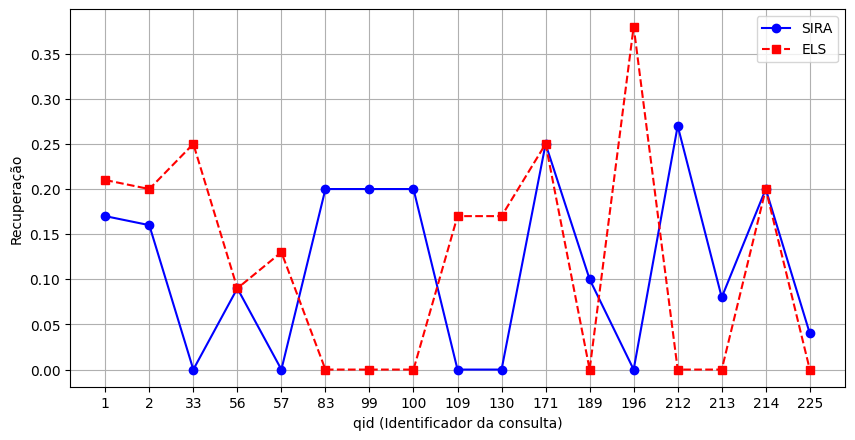

In [278]:
nir = local_query_data["nir_recall"]
els = local_query_data["els_recall"]

fig, ax = plt.subplots(figsize=(10, 4.9))
ax.plot(nir, "o", label="SIRA", linestyle='-',color='blue')
ax.plot(els, "s", label="ELS", linestyle='--',color='red')

i = 0
x_stick = []
for qid in list_qid:
    x_stick.append(i)
    i = i + 1

x_labels = list_qid
plt.xticks(ticks=x_stick, labels=x_labels)
plt.xticks(ticks=x_stick, labels=x_labels)

#add axis labels to plot
# ax.set_title('F1 Sore')
ax.set_xlabel('qid (Identificador da consulta)')
ax.set_ylabel('Recuperação')
ax.legend()
ax.grid(True)
# plt.show()
plt.savefig("pdf/recall.pdf", format="pdf")

## Precision

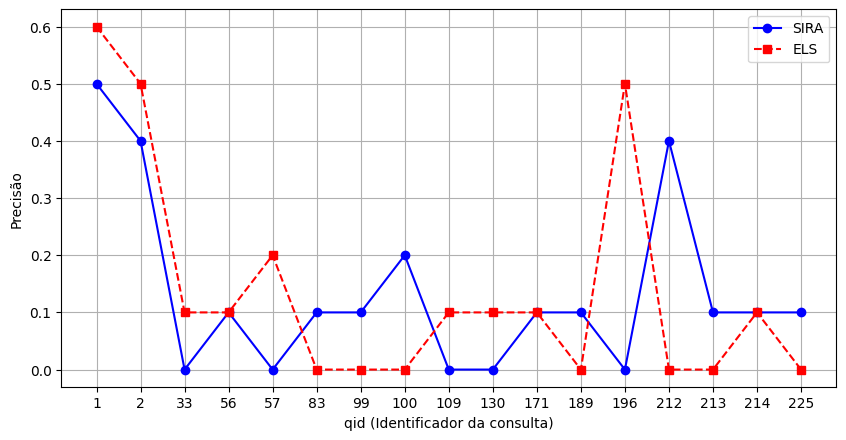

In [279]:
nir = local_query_data["nir_precision"]
els = local_query_data["els_precision"]

fig, ax = plt.subplots(figsize=(10, 4.9))
ax.plot(nir, "o", label="SIRA", linestyle='-',color='blue')
ax.plot(els, "s", label="ELS", linestyle='--',color='red')

i = 0
x_stick = []
for qid in list_qid:
    x_stick.append(i)
    i = i + 1

x_labels = list_qid
plt.xticks(ticks=x_stick, labels=x_labels)
plt.xticks(ticks=x_stick, labels=x_labels)

#add axis labels to plot
# ax.set_title('F1 Sore')
ax.set_xlabel('qid (Identificador da consulta)')
ax.set_ylabel('Precisão')
ax.legend()
ax.grid(True)
# plt.show()
plt.savefig("pdf/precision.pdf", format="pdf")

## F1

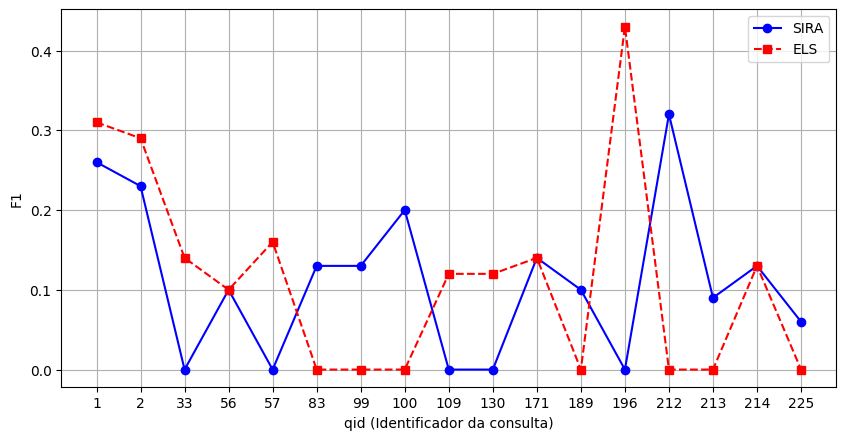

In [280]:
nir = local_query_data["nir_f_scores"]
els = local_query_data["els_f_scores"]

fig, ax = plt.subplots(figsize=(10, 4.9))
ax.plot(nir, "o", label="SIRA", linestyle='-',color='blue')
ax.plot(els, "s", label="ELS", linestyle='--',color='red')

i = 0
x_stick = []
for qid in list_qid:
    x_stick.append(i)
    i = i + 1

x_labels = list_qid
plt.xticks(ticks=x_stick, labels=x_labels)
plt.xticks(ticks=x_stick, labels=x_labels)

#add axis labels to plot
# ax.set_title('F1 Sore')
ax.set_xlabel('qid (Identificador da consulta)')
ax.set_ylabel('F1')
ax.legend()
ax.grid(True)
# plt.show()
plt.savefig("pdf/f1.pdf", format="pdf")

## DCG

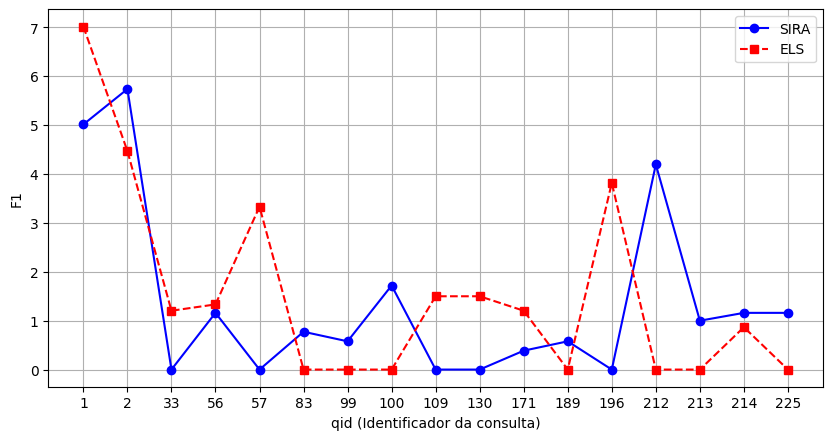

In [281]:
nir = list_dcg_nir
els = list_dcg_els

fig, ax = plt.subplots(figsize=(10, 4.9))
ax.plot(nir, "o", label="SIRA", linestyle='-',color='blue')
ax.plot(els, "s", label="ELS", linestyle='--',color='red')

i = 0
x_stick = []
for qid in list_qid:
    x_stick.append(i)
    i = i + 1

x_labels = list_qid
plt.xticks(ticks=x_stick, labels=x_labels)
plt.xticks(ticks=x_stick, labels=x_labels)

#add axis labels to plot
# ax.set_title('F1 Sore')
ax.set_xlabel('qid (Identificador da consulta)')
ax.set_ylabel('F1')
ax.legend()
ax.grid(True)
# plt.show()
plt.savefig("pdf/dcg.pdf", format="pdf")

## IDCG, DCG, NDCG - ELS

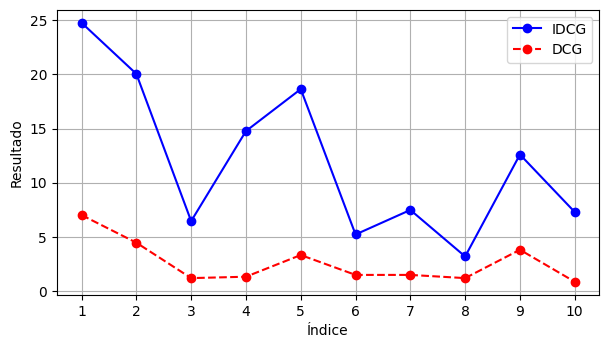

In [282]:
els_idcg_chart = ev.dict_to_list(els_ndcg['true_dcg_k'])
els_dcg_chart = ev.dict_to_list(els_ndcg['els_dcg_k'])
# nir_ndcg = ev.dict_to_list(nir_ndcg['nir_ndcg_k'])

fig, ax = plt.subplots(figsize=(7, 3.7))
ax.plot(els_idcg_chart, "o", label="IDCG", linestyle='-',color='blue')
ax.plot(els_dcg_chart, "o", label="DCG", linestyle='--',color='red')
# ax.plot(nir_ndcg, "o", label="NDCG", linestyle='-',color='green')

x_stick = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
x_labels = ["1", "2", "3", "4", "5", "6", "7", "8", "9", "10"]
plt.xticks(ticks=x_stick, labels=x_labels)
plt.xticks(ticks=x_stick, labels=x_labels)

#add axis labels to plot
# ax.set_title('F1 Sore')
ax.set_xlabel('Índice')
ax.set_ylabel('Resultado')
ax.legend()
ax.grid(True)
plt.savefig("pdf/els_idcg.pdf", format="pdf")

## NDCG

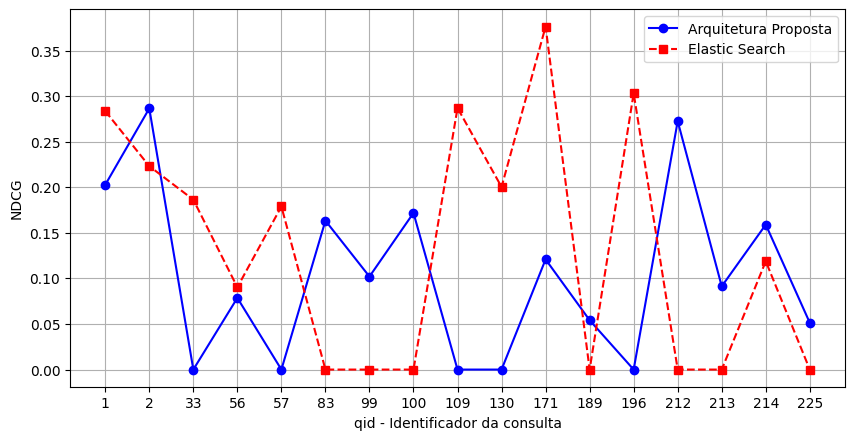

In [283]:
nir = list_ndcg_nir
els = list_ndcg_els

fig, ax = plt.subplots(figsize=(10, 4.9))
ax.plot(nir, "o", label="Arquitetura Proposta", linestyle='-',color='blue')
ax.plot(els, "s", label="Elastic Search", linestyle='--',color='red')

i = 0
x_stick = []
for qid in list_qid:
    x_stick.append(i)
    i = i + 1

x_labels = list_qid
plt.xticks(ticks=x_stick, labels=x_labels)
plt.xticks(ticks=x_stick, labels=x_labels)

#add axis labels to plot
# ax.set_title('F1 Sore')
ax.set_xlabel('qid - Identificador da consulta')
ax.set_ylabel('NDCG')
ax.legend()
ax.grid(True)
# plt.show()
plt.savefig("pdf/ndcg.pdf", format="pdf")